<a href="https://colab.research.google.com/github/henry8695/Henry-Woodward/blob/master/Coronavirus_Analysis_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CORONAVIRUS ANALYSIS**



# Setting up Environment

In [0]:
#Installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importing Files

In [533]:
#Importing COVID-19 file
from google.colab import files
upload = files.upload()

Saving time_series_covid_19_confirmed (1).csv to time_series_covid_19_confirmed (1) (1).csv


In [534]:
#Importing population density file
from google.colab import files
upload = files.upload()

Saving population density.csv to population density (1).csv


In [535]:
#Importing population file
from google.colab import files
upload = files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv to API_SP.POP.TOTL_DS2_en_csv_v2_821007 (1).csv


In [536]:
#Importing urban population file
from google.colab import files
upload = files.upload()

Saving API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361.csv to API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361 (1).csv


In [537]:
#Importing temperature file
from google.colab import files
upload = files.upload()

Saving temperature.csv to temperature (1).csv


# Pre-processing COVID-19 Data

In [538]:
#Setting up dataframe
covid_19 = pd.read_csv("time_series_covid_19_confirmed (1).csv")
covid_19.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124,125,0.0


In [539]:
#Subsetting for mimumin cases
covid_19=covid_19[(covid_19["3/4/20"]>30)]
covid_19

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124,125,0.0
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352,1353,NaN
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,NaN
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,NaN
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,NaN
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,317,318,318,318,318,318,318,318,318,318,318,318,318,0.0


In [540]:
#Renaming variables
covid_19.rename(columns={"Country/Region":"Country"}, inplace=True)
covid_19


,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.82570,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.18240,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.05720,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.07890,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124,125,0.0
5,Guangdong,Mainland China,23.34170,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352,1353,NaN
6,Guangxi,Mainland China,23.82980,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,NaN
7,Guizhou,Mainland China,26.81540,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,NaN
8,Hainan,Mainland China,19.19590,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,NaN
9,Hebei,Mainland China,38.04280,114.5149,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,317,318,318,318,318,318,318,318,318,318,318,318,318,0.0


In [541]:
#Taking out China and US
covid_19 = covid_19[covid_19.Country != "Mainland China"]
covid_19 = covid_19[covid_19.Country != "US"]
covid_19 = covid_19[covid_19.Country != "Others"]
covid_19 = covid_19[covid_19.Country != "Taipei and environs"]
covid_19

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
31,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59.0
32,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639.0
35,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178.0
36,NaN,France,47.0000,2.0000,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,NaN
38,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149.0
46,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908.0
51,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462.0
52,NaN,UK,55.0000,-3.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,85,115,163,206,273,321,382,NaN
53,NaN,Sweden,63.0000,16.0000,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,7,7,12,14,15,21,35,94,101,161,203,248,355,500.0
54,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277.0


In [542]:
#Taking out unnecessary variables
covid_19.columns
covid_19=covid_19.drop(['Province/State','Lat', 'Long','1/22/20', '1/23/20','1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20','1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20','2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20','2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20','2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20','2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20','3/11/20'], axis=1)
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
31,Thailand,43,43,43,47,48,50,50,50,53
32,Japan,274,293,331,360,420,461,502,511,581
35,Singapore,108,110,110,117,130,138,150,150,160
36,France,191,204,285,377,653,949,1126,1209,1784
38,Malaysia,29,36,50,50,83,93,99,117,129
46,Germany,159,196,262,482,670,799,1040,1176,1457
51,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149
52,UK,40,51,85,115,163,206,273,321,382
53,Sweden,15,21,35,94,101,161,203,248,355
54,Spain,120,165,222,259,400,500,673,1073,1695


In [543]:
covid_19.columns

Index(['Country', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20'],
      dtype='object')

In [544]:
#Creating growth rate variable
covid_19['Growth Rate']=covid_19['3/10/20']/covid_19['3/4/20']
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate
31,Thailand,43,43,43,47,48,50,50,50,53,1.232558
32,Japan,274,293,331,360,420,461,502,511,581,1.755287
35,Singapore,108,110,110,117,130,138,150,150,160,1.454545
36,France,191,204,285,377,653,949,1126,1209,1784,6.259649
38,Malaysia,29,36,50,50,83,93,99,117,129,2.580000
46,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069
51,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529
52,UK,40,51,85,115,163,206,273,321,382,4.494118
53,Sweden,15,21,35,94,101,161,203,248,355,10.142857
54,Spain,120,165,222,259,400,500,673,1073,1695,7.635135


#Importing and processing population density data

In [545]:
#Loading dataframe
density = pd.read_csv("population density.csv")
density.head

<bound method NDFrame.head of      Country Name Country Code  ...        2017        2018
0           Aruba          ABW  ...  585.366667  588.027778
1     Afghanistan          AFG  ...   55.595993   56.937760
2          Angola          AGO  ...   23.916538   24.713052
3         Albania          ALB  ...  104.870693  104.612263
4         Andorra          AND  ...  163.831915  163.842553
..            ...          ...  ...         ...         ...
259        Kosovo          XKX  ...  168.154680         NaN
260   Yemen, Rep.          YEM  ...   52.720459   53.977853
261  South Africa          ZAF  ...   46.987817   47.630120
262        Zambia          ZMB  ...   22.671395   23.341479
263      Zimbabwe          ZWE  ...   36.801719   37.324591

[264 rows x 63 columns]>

In [546]:
#Subsetting relevant variables
density=density.loc[:,["Country Name","2018"]]
density

,Country Name,2018
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",53.977853
261,South Africa,47.630120
262,Zambia,23.341479


In [547]:
#Changing variable names
density.columns=["Country","Population Density"]
density

,Country,Population Density
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",53.977853
261,South Africa,47.630120
262,Zambia,23.341479


In [548]:
#Inspection
density["Country"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'Mainland China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cabo Verde', 'Costa Rica', 'Caribbean small states', 'Cuba',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',

In [549]:
#Removing Outliers
density=density[density["Population Density"] < 1000]
density

,Country,Population Density
0,Aruba,588.027778
1,Afghanistan,56.937760
2,Angola,24.713052
3,Albania,104.612263
4,Andorra,163.842553
...,...,...
258,Samoa,69.303887
260,"Yemen, Rep.",53.977853
261,South Africa,47.630120
262,Zambia,23.341479


In [550]:
#Merging with covid_19
left=covid_19
right=density
covid_19=pd.merge(left, right, on="Country")
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570


# Importing and pre-processing population data

In [551]:
#Setting up dataframe
population = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv")
population.head

<bound method NDFrame.head of      Country Name Country Code     Indicator Name  ...        2017        2018  2019
0           Aruba          ABW  Population, total  ...    105366.0    105845.0   NaN
1     Afghanistan          AFG  Population, total  ...  36296400.0  37172386.0   NaN
2          Angola          AGO  Population, total  ...  29816748.0  30809762.0   NaN
3         Albania          ALB  Population, total  ...   2873457.0   2866376.0   NaN
4         Andorra          AND  Population, total  ...     77001.0     77006.0   NaN
..            ...          ...                ...  ...         ...         ...   ...
259        Kosovo          XKX  Population, total  ...   1830700.0   1845300.0   NaN
260   Yemen, Rep.          YEM  Population, total  ...  27834821.0  28498687.0   NaN
261  South Africa          ZAF  Population, total  ...  57000451.0  57779622.0   NaN
262        Zambia          ZMB  Population, total  ...  16853688.0  17351822.0   NaN
263      Zimbabwe          ZWE  Pop

In [552]:
#Subsetting relevant variables
population=population.loc[:,["Country Name","2018"]]
population

,Country Name,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,Kosovo,1845300.0
260,"Yemen, Rep.",28498687.0
261,South Africa,57779622.0
262,Zambia,17351822.0


In [553]:
#Changing variable names
population.columns=["Country","Population"]
population

,Country,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,Kosovo,1845300.0
260,"Yemen, Rep.",28498687.0
261,South Africa,57779622.0
262,Zambia,17351822.0


In [554]:
#Merging with covid_19
left=covid_19
right=population
covid_19=pd.merge(left, right, on="Country")
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0


# Pre-processing urban population dataset

In [555]:
#Setting up the dataframe
urban=pd.read_csv("API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361.csv")
urban

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761,50.746,50.730,50.715,50.700,50.685,50.670,50.654,50.639,50.624,50.609,50.593,50.578,50.563,50.548,50.532,50.517,50.502,50.487,50.472,50.456,50.441,50.426,50.411,50.395,50.380,50.365,50.350,50.335,50.319,50.304,49.998,49.588,49.177,48.767,48.356,47.946,47.536,47.127,46.717,46.339,45.972,45.606,45.240,44.875,44.511,44.147,43.783,43.421,43.059,42.940,42.957,42.990,43.041,43.108,43.192,43.293,43.411,NaN
1,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401,8.684,8.976,9.276,9.586,9.904,10.233,10.570,10.918,11.275,11.643,12.021,12.410,12.809,13.219,13.641,14.074,14.517,14.973,15.442,15.995,16.562,17.147,17.747,18.365,18.997,19.647,20.314,20.998,21.088,21.177,21.266,21.355,21.444,21.534,21.624,21.714,21.805,21.895,21.986,22.078,22.169,22.261,22.353,22.500,22.703,22.907,23.113,23.320,23.528,23.737,23.948,24.160,24.373,24.587,24.803,25.020,25.250,25.495,NaN
2,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435,10.798,11.204,11.624,12.058,12.504,12.965,13.441,13.932,14.436,14.957,15.632,16.455,17.310,18.202,19.128,20.092,21.088,22.122,23.192,24.298,25.437,26.612,27.821,29.065,30.338,31.643,32.978,34.343,35.731,37.144,38.580,40.039,41.511,43.000,44.169,45.346,46.525,47.710,48.897,50.087,51.274,52.461,53.645,54.827,56.000,56.764,57.524,58.282,59.034,59.783,60.528,61.268,62.002,62.731,63.446,64.149,64.839,65.514,NaN
3,Albania,ALB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,30.705,30.943,31.015,31.086,31.158,31.230,31.302,31.374,31.446,31.548,31.740,31.933,32.127,32.321,32.516,32.712,32.908,33.105,33.302,33.500,33.762,34.024,34.287,34.552,34.817,35.083,35.350,35.619,35.888,36.158,36.428,36.700,37.249,37.799,38.354,38.911,39.473,40.035,40.601,41.169,41.741,42.435,43.501,44.573,45.651,46.731,47.815,48.902,49.991,51.076,52.163,53.247,54.330,55.387,56.423,57.434,58.421,59.383,60.319,NaN
4,Andorra,AND,Urban population (% of total population),SP.URB.TOTL.IN.ZS,58.450,60.983,63.462,65.872,68.205,70.445,72.593,74.641,76.588,78.424,80.155,81.780,83.301,84.716,86.032,87.252,88.382,89.420,90.378,91.257,92.064,92.800,93.474,94.089,94.649,95.159,95.325,95.178,95.027,94.872,94.712,94.530,94.324,94.111,93.890,93.661,93.425,93.180,92.927,92.666,92.395,92.056,91.641,91.207,90.751,90.285,89.807,89.308,89.004,88.912,88.819,88.726,88.631,88.537,88.441,88.345,88.248,88.150,88.062,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,9.100,9.459,9.831,10.216,10.614,11.026,11.451,11.891,12.347,12.815,13.300,13.598,13.901,14.209,14.524,14.844,15.171,15.502,15.840,16.183,16.534,16.889,17.251,17.619,17.993,18.373,18.808,19.323,19.849,20.385,20.931,21.489,22.058,22.636,23.225,23.760,24.249,24.743,25.244,25.752,26.267,26.787,27.315,27.849,28.390,28.936,29.490,30.051,30.619,31.194,31.776,32.364,32.958,33.559,34.165,34.777,35.394,36.016,36.642,NaN
261,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.619,46.793,46.906,47.020,47.134,47.248,47.362,

In [556]:
#Subsetting relevant variables
urban=urban.loc[:,["Country Name","2018"]]
urban

,Country Name,2018
0,Aruba,43.411
1,Afghanistan,25.495
2,Angola,65.514
3,Albania,60.319
4,Andorra,88.062
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",36.642
261,South Africa,66.355
262,Zambia,43.521


In [557]:
#Changing variable names
urban.columns=["Country","Urban"]
urban

,Country,Urban
0,Aruba,43.411
1,Afghanistan,25.495
2,Angola,65.514
3,Albania,60.319
4,Andorra,88.062
...,...,...
259,Kosovo,NaN
260,"Yemen, Rep.",36.642
261,South Africa,66.355
262,Zambia,43.521


In [558]:
#Merging with covid_19
left=covid_19
right=urban
covid_19=pd.merge(left, right, on="Country")
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473


# Pre-processing temperature dataset

In [559]:
#Loading dataframe
temperature = pd.read_csv("temperature.csv")
temperature

,Country,Temperature,Unnamed: 2
0,Thailand,301.261111,NaN
1,Japan,282.150000,NaN
2,France,277.761111,NaN
3,Malaysia,300.372222,NaN
4,Germany,274.872222,NaN
5,Italy,281.650000,NaN
6,UK,278.250000,NaN
7,Sweden,270.261111,NaN
8,Spain,280.372222,NaN
9,Iraq,286.372222,NaN


In [560]:
#Subsetting relevant variables
temperature=temperature.loc[:,["Country","Temperature"]]
temperature

,Country,Temperature
0,Thailand,301.261111
1,Japan,282.150000
2,France,277.761111
3,Malaysia,300.372222
4,Germany,274.872222
5,Italy,281.650000
6,UK,278.250000
7,Sweden,270.261111
8,Spain,280.372222
9,Iraq,286.372222


In [561]:
#Merging with covid-19
left=covid_19
right=temperature
covid_19=pd.merge(left, right, on="Country")
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban,Temperature
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949,301.261111
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616,282.150000
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444,277.761111
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036,300.372222
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312,274.872222
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438,281.650000
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398,278.250000
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431,270.261111
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321,280.372222
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473,286.372222


# Basic Visualisations

In [562]:
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban,Temperature
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949,301.261111
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616,282.150000
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444,277.761111
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036,300.372222
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312,274.872222
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438,281.650000
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398,278.250000
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431,270.261111
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321,280.372222
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473,286.372222


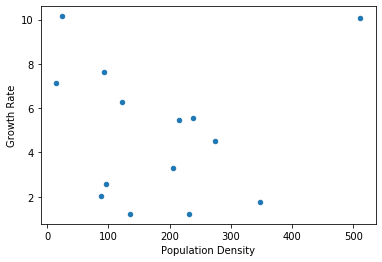

In [563]:
#Population density on growth rate scatterplot
covid_19.plot("Population Density", "Growth Rate", "scatter")

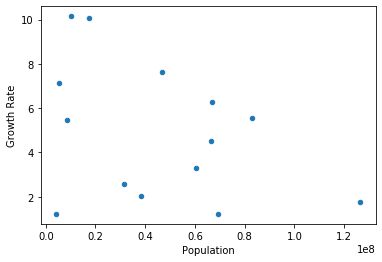

In [564]:
#Population on growth rate scatterplot
covid_19.plot("Population", "Growth Rate", "scatter")

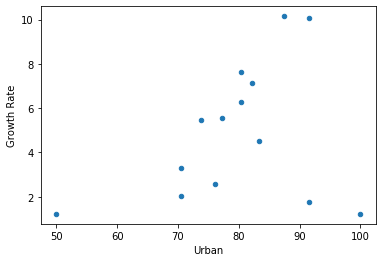

In [565]:
#Urban population on growth rate
covid_19.plot("Urban", "Growth Rate", "scatter")

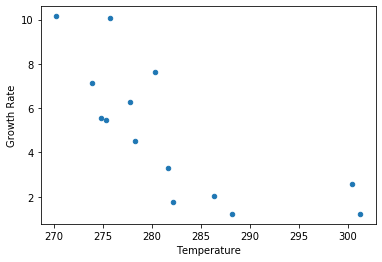

In [566]:
#Temperature on growth rate
covid_19.plot("Temperature", "Growth Rate", "scatter")

# Simple linear modelling

In [567]:
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban,Temperature
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949,301.261111
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616,282.150000
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444,277.761111
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036,300.372222
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312,274.872222
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438,281.650000
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398,278.250000
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431,270.261111
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321,280.372222
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473,286.372222


In [568]:
#Population density on growth rate statistics
x=covid_19["Population Density"]
y=covid_19["Growth Rate"]
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                  0.003285
Date:                Fri, 13 Mar 2020   Prob (F-statistic):              0.955
Time:                        18:42:52   Log-Likelihood:                -35.037
No. Observations:                  14   AIC:                             74.07
Df Residuals:                      12   BIC:                             75.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8482      1.494      3.246      0.007       1.594       8.102
Population Density     0.0004      0.007      0.057      0.955      -0.014       0.015
==============================================================================
Omnibus:                        1.387   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.977
Skew:                           0.375   Prob(JB):                        0.613
Kurtosis:                       1.945   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [569]:
#Population density on growth rate statistics
x=covid_19["Population Density"]
y=covid_19["Growth Rate"]
results = sm.OLS(y,sm.add_constant(x)).fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                  0.003285
Date:                Fri, 13 Mar 2020   Prob (F-statistic):              0.955
Time:                        18:42:52   Log-Likelihood:                -35.037
No. Observations:                  14   AIC:                             74.07
Df Residuals:                      12   BIC:                             75.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.8482      1.494      3.246      0.007       1.594       8.102
Population Density     0.0004      0.007      0.057      0.955      -0.014       0.015
==============================================================================
Omnibus:                        1.387   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.977
Skew:                           0.375   Prob(JB):                        0.613
Kurtosis:                       1.945   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
#Population on growth rate statistic
x1=covid_19["Population"]
y1=covid_19["Growth Rate"]
x1=sm.add_constant(x1)
model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1)
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth Rate   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.137
Date:                Fri, 13 Mar 2020   Prob (F-statistic):              0.169
Time:                        18:42:52   Log-Likelihood:                -33.891
No. Observations:                  14   AIC:                             71.78
Df Residuals:                      12   BIC:                             73.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4298      1.299      4.951      0.000       3.600       9.259
Population -3.333e-08   2.28e-08     -1.462      0.169    -8.3e-08    1.63e-08
==============================================================================
Omnibus:                        0.630   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.591
Skew:                          -0.105   Prob(JB):                        0.744
Kurtosis:                       2.016   Cond. No.                     9.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [571]:
#Urban on growth rate statistic
x2=covid_19["Urban"]
y2=covid_19["Growth Rate"]
model = sm.OLS(y2, x2).fit()
predictions = model.predict(x2)
model.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Growth Rate   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              41.03
Date:                Fri, 13 Mar 2020   Prob (F-statistic):                    2.32e-05
Time:                        18:42:52   Log-Likelihood:                         -34.353
No. Observations:                  14   AIC:                                      70.71
Df Residuals:                      13   BIC:                                      71.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Urban          0.0621      0.010      6.406      0.000       0.041       0.083
==============================================================================
Omnibus:                        0.353   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.472
Skew:                           0.039   Prob(JB):                        0.790
Kurtosis:                       2.104   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
x3=covid_19["Temperature"]
y3=covid_19["Growth Rate"]
x3=sm.add_constant(x3)
model = sm.OLS(y2, x3).fit()
predictions = model.predict(x3)
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth Rate   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     14.81
Date:                Fri, 13 Mar 2020   Prob (F-statistic):            0.00232
Time:                        18:42:52   Log-Likelihood:                -29.413
No. Observations:                  14   AIC:                             62.83
Df Residuals:                      12   BIC:                             64.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          73.6437     17.870      4.121      0.001      34.708     112.580
Temperature    -0.2438      0.063     -3.848      0.002      -0.382      -0.106
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                0.939
Skew:                           0.284   Prob(JB):                        0.625
Kurtosis:                       1.866   Cond. No.                     8.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicted vs Actual Growth Rate

In [573]:
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban,Temperature
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949,301.261111
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616,282.150000
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444,277.761111
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036,300.372222
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312,274.872222
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438,281.650000
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398,278.250000
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431,270.261111
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321,280.372222
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473,286.372222


In [0]:
covid_19["Predicted Growth_Temperature"]=predictions

In [575]:
covid_19["Country Performance"]=(covid_19["Growth Rate"]/covid_19["Predicted Growth_Temperature"])
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population,Urban,Temperature,Predicted Growth_Temperature,Country Performance
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0,49.949,301.261111,0.197080,6.254102
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0,91.616,282.150000,4.856316,0.361444
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0,80.444,277.761111,5.926314,1.056247
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0,76.036,300.372222,0.413789,6.235068
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0,77.312,274.872222,6.630617,0.838695
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0,70.438,281.650000,4.978214,0.659982
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0,83.398,278.250000,5.807125,0.773897
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0,87.431,270.261111,7.754793,1.307947
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0,80.321,280.372222,5.289733,1.443388
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0,70.473,286.372222,3.826950,0.530075


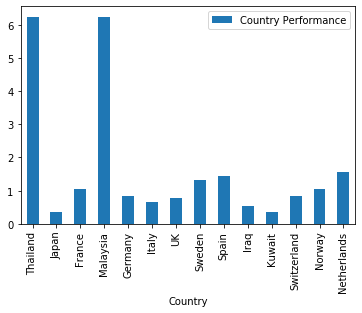

In [576]:
covid_19.plot("Country", "Country Performance", 'bar')

# Multiple Regression Modelling

In [577]:
#Urban on growth rate statistic
x3=covid_19[["Urban", "Population", "Population Density", "Temperature"]]
y3=covid_19["Growth Rate"]
x3=sm.add_constant(x3)
model = sm.OLS(y3, x3).fit()
predictions = model.predict(x3)
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Growth Rate   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     4.026
Date:                Fri, 13 Mar 2020   Prob (F-statistic):             0.0385
Time:                        18:42:52   Log-Likelihood:                -27.859
No. Observations:                  14   AIC:                             65.72
Df Residuals:                       9   BIC:                             68.91
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 77.7196     23.655      3.286      0.009      24.208     131.231
Urban                 -0.0319      0.064     -0.499      0.630      -0.177       0.113
Population         -2.715e-08   1.88e-08     -1.445      0.182   -6.97e-08    1.54e-08
Population Density     0.0013      0.005      0.241      0.815      -0.011       0.013
Temperature           -0.2457      0.075     -3.290      0.009      -0.415      -0.077
==============================================================================
Omnibus:                        2.197   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                0.973
Skew:                           0.086   Prob(JB):                        0.615
Kurtosis:                       1.720   Cond. No.                     2.28e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""